# eXtreame Gradient Boost Model

In [72]:
# Load the good stuff 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import xgboost as xgb
from xgboost import XGBRegressor 
warnings.filterwarnings(action='ignore')




In [52]:
# load the data
df_train = pd.read_csv(r'C:\Users\court\Desktop\AdvRegPre\regression_JM3_DSFT\regression_JM3_DSFT\data\df-train_set.csv')
df_test = pd.read_csv(r'C:\Users\court\Desktop\AdvRegPre\regression_JM3_DSFT\regression_JM3_DSFT\data\df-test_set.csv')

In [53]:
#Getting the months and quarters for the dates for train data by converting the data to datetime format
df_gda = df_train[df_train.Commodities == 'APPLE GOLDEN DELICIOUS']
df_gda.date = pd.to_datetime(df_gda.Date) 
df_gda["Quarter"] = df_gda.date.dt.quarter 
df_gda["Month"] = df_gda.date.dt.month
df_gda["Year"] = df_gda.date.dt.year

df_gda.head()

<ipython-input-53-54eee4cdb0a0>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_gda.date = pd.to_datetime(df_gda.Date)
<ipython-input-53-54eee4cdb0a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gda["Quarter"] = df_gda.date.dt.quarter
<ipython-input-53-54eee4cdb0a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gda["Month"] = df_gda.date.dt.month
<ipython-input-53-54eee4cd

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,2020
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,2020
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,2020
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,2020
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,2020


In [ ]:
#Getting the months and quarters for the dates for test data
df_test.date = pd.to_datetime(df_test.Date)
df_test["Quarter"] = df_test.date.dt.quarter
df_test["Month"] = df_test.date.dt.month
df_test["Year_Month"] = df_test.date.dt.year
df_test.head()

In [54]:
# Don't need the date calumn anymore
df_gda = df_gda.drop('Date', axis=1)
df_gda.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,2020
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,2020
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,2020
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,2020
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,2020


In [55]:
# Dummy variables
dummy_df = pd.get_dummies(df_gda, drop_first=True)
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,...,0,0,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,...,0,0,0,0,0,0,1,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,...,0,0,0,0,0,0,0,1,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,...,0,0,1,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,...,0,0,1,0,0,0,0,0,0,0


In [56]:
# Set y 
x = dummy_df.drop('avg_price_per_kg', axis=1)
y = dummy_df['avg_price_per_kg']

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)
Training score:  0.9993001124900608
Mean cross-validation score: 0.94
K-fold CV average score: 0.94
MSE: 0.19
RMSE: 0.44


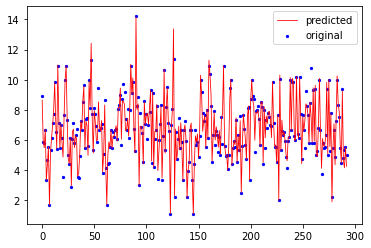

In [37]:
# SUPER MODEL TRAINING AND EXECUTION 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)

xgbr.fit(xtrain, ytrain)
 
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 
 
# - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [57]:
train_xgb = xgbr.predict(xtrain)

In [58]:
test_xgb = xgbr.predict(xtest)

In [59]:
from sklearn import metrics

In [60]:
# Dictionary of results
results_dict = {'Training MSE':
                    {
                        
                        "XGB": metrics.mean_squared_error(ytrain, train_xgb)
                    },
                    'Test MSE':
                    {
                       
                        "XGB": metrics.mean_squared_error(ytest, test_xgb)
                    }
                }

In [61]:
results_df = pd.DataFrame(data=results_dict)

In [62]:
results_df

,Training MSE,Test MSE
XGB,0.00364,0.1908


In [63]:
#Saving the data
import pickle

model_save_path = "dct_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(xgbr,file)

In [65]:
df_test = df_test.drop('Date', axis=1)
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,128.0,136.0,5008.0,38,456.0,0,3,7,2020
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,220.0,220.0,1760.0,8,146.4,2,1,1,2020
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,120.0,120.0,720.0,6,72.0,45,3,8,2020
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,160.0,160.0,160.0,1,18.3,8,2,5,2020
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,140.0,160.0,14140.0,100,1830.0,19,2,5,2020


In [66]:
test_ID = df_test['Index']
df_test = df_test.drop('Index', axis=1)

In [67]:
X_real = pd.get_dummies(df_test, drop_first=True)
X_real.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,12.0,128.0,136.0,5008.0,38,456.0,0,3,7,2020,...,0,1,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,1,1,2020,...,0,0,0,0,1,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,3,8,2020,...,0,0,1,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,2,5,2020,...,0,1,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,2,5,2020,...,0,0,0,0,0,0,0,0,0,0


In [68]:
prediction = xgbr.predict(X_real)

In [69]:
# create submission dataframe
# Create Dataframe of Order_No and Time from Pickup to Arrival
submission = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg': prediction
    })

In [70]:
submission.head()

,Index,avg_price_per_kg
0,1,10.848449
1,2,12.250501
2,3,9.967229
3,4,8.659399
4,5,8.066556


In [71]:
submission.to_csv("xgbDT.csv", index=False)